In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## ACE R/W Ratio Experiments

In [ ]:
ace_data = [
    [0, 9176.98, 13710],
    [5, 9006.71, 13537],
    [10, 8754.76, 13369],
    [15, 8619.69, 13159],
    [20, 8423.11, 12958],
    [25, 8149.77, 12668],
    [30, 7812.39, 12406],
    [35, 7656.41, 12102],
    [40, 7289.76, 11710],
    [45, 6743.55, 11313],
    [50, 6406.07, 10915],
    [55, 5883.75, 10435],
    [60, 5455.05, 9884],
    [65, 4952.95, 9269],
    [70, 4378.26, 8562],
    [75, 3750.7, 7724],
    [80, 3051.91, 6739],
    [85, 2421.25, 5548],
    [90, 1797.41, 4090],
    [95, 1432.47, 2384],
    [100, 426.804, 0],
    
]

base_data = [
    [0, 7694.59, 25084],
    [5, 7563.73, 24474],
    [10, 7422.57, 24430],
    [15, 7276.26, 24026],
    [20, 7187.71, 23642],
    [25, 7067.34, 23140],
    [30, 6932.93, 22671],
    [35, 6772.61, 22139],
    [40, 6672.92, 21453],
    [45, 6497.47, 20788],
    [50, 6265.75, 20046],
    [55, 6086.56, 19191],
    [60, 5807.94, 18201],
    [65, 5596.36, 17101],
    [70, 5269.74, 15827],
    [75, 4883.56, 14335],
    [80, 4425.8, 12525],
    [85, 3875.17, 10347],
    [90, 3248.84, 7668],
    [95, 2412.96, 4347],
    [100, 427.274, 0]
]

base_data = [["base"] + row for row in base_data]
ace_data = [["ace"] + row for row in ace_data]

df = pd.DataFrame(base_data + ace_data, columns=["type", "read ratio", "exec time", "write ios"])
df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df2 in df.groupby('type'):
    df2.plot(x='read ratio', y='exec time', marker='o', ax=ax, label=label)
plt.xlabel('% Reads')
plt.ylabel('Exec Time (ms)')
plt.title('ACE Latency over Varying R/W Ratio Workloads')
plt.show();

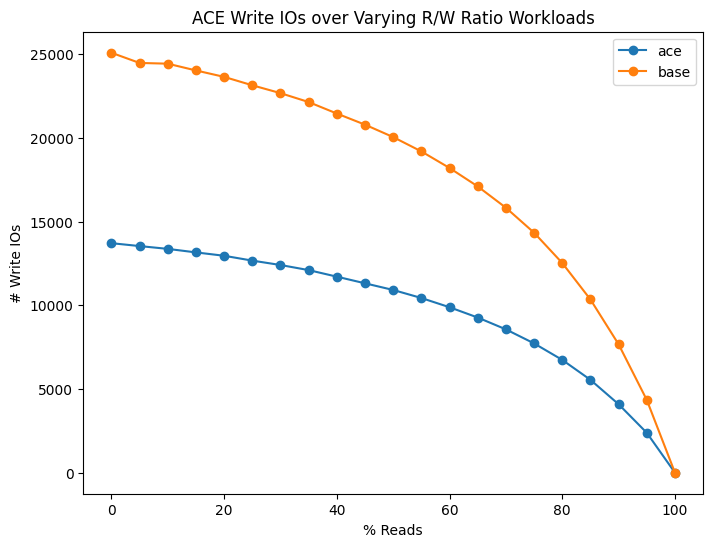

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df2 in df.groupby('type'):
    df2.plot(x='read ratio', y='write ios', marker='o', ax=ax, label=label)
plt.xlabel('% Reads')
plt.ylabel('# Write IOs')
plt.title('ACE Write IOs over Varying R/W Ratio Workloads')
plt.show();

## FEMU Asymmetry Experiments

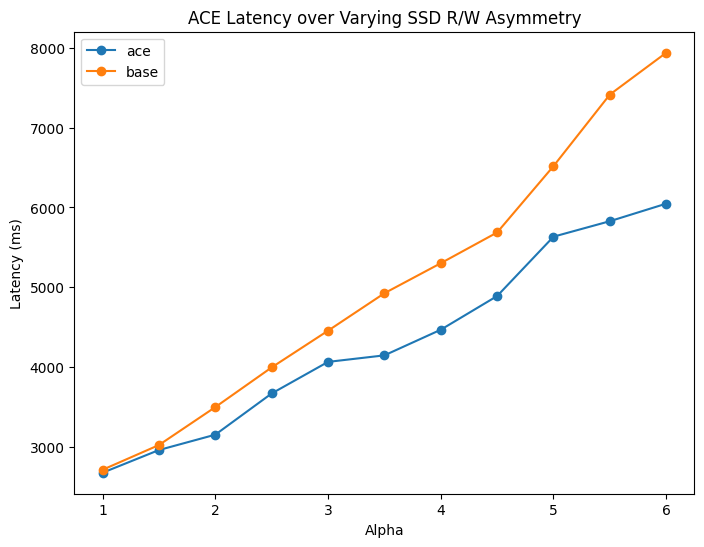

In [6]:
# base read_lat=400000, r/w ratio=50/50
ace_data = [
    [1, 2679.64],
    [1.5, 2963.67],
    [2, 3155.87],
    [2.5, 3671.53],
    [3, 4066.79],
    [3.5, 4148.45],
    [4, 4469.21],
    [4.5, 4890.81],
    [5, 5633.76],
    [5.5, 5827.58],
    [6, 6047.05],
]

base_data = [
    [1, 2716.66],
    [1.5, 3026.21],
    [2, 3500.83],
    [2.5, 3997.73],
    [3, 4457.06],
    [3.5, 4925.9],
    [4, 5301.7],
    [4.5, 5686.48],
    [5, 6516.8],
    [5.5, 7412.46],
    [6, 7935.99]
]

base_data = [["base"] + row for row in base_data]
ace_data = [["ace"] + row for row in ace_data]
df = pd.DataFrame(base_data + ace_data, columns=["type", "alpha", "latency"])

fig, ax = plt.subplots(figsize=(8,6))
for label, df2 in df.groupby('type'):
    df2.plot(x='alpha', y='latency', marker='o', ax=ax, label=label)
plt.xlabel('Alpha')
plt.ylabel('Latency (ms)')
plt.title('ACE Latency over Varying SSD R/W Asymmetry')
plt.show();

## FIO Data (Toby's individual expts)

- "chans" set by changing n_chs in run_blackbox.sh
  - and adjusting size in same ratio
- "numjobs" set in fio
  - ioengine: libaio, size: 256m, rw: randrw (random reads/writes)

In [26]:
fio_data = [
    {"chans": 4, "numjobs": 1, "riops": 2397.7, "rkb/s": 9591, "wiops": 2398.52, "wkb/s": 9604},
    {"chans": 4, "numjobs": 2, "riops": 4859.42, "rkb/s": 19438, "wiops": 4883.56, "wkb/s": 19534},
    {"chans": 4, "numjobs": 4, "riops": 6538.18, "rkb/s": 26153, "wiops": 6564.84, "wkb/s": 26260},
    {"chans": 4, "numjobs": 8, "riops": 10815, "rkb/s": 43262, "wiops": 10823.29, "wkb/s": 43295},
    {"chans": 4, "numjobs": 16, "riops": 13403.7, "rkb/s": 53615, "wiops": 13404.93, "wkb/s": 53620},
    {"chans": 4, "numjobs": 32, "riops": 18120.39, "rkb/s": 72489, "wiops": 18113.21, "wkb/s": 72461},
    {"chans": 4, "numjobs": 64, "riops": 21308.30, "rkb/s": 85267, "wiops": 21311.65, "wkb/s": 85280},
    
    {"chans": 8, "numjobs": 1, "riops": 2509.23, "rkb/s": 10037.5, "wiops": 2514.35, "wkb/s": 10057.96},
    {"chans": 8, "numjobs": 2, "riops": 3895.09, "rkb/s": 15581, "wiops": 3915.29, "wkb/s": 15662},
    {"chans": 8, "numjobs": 4, "riops": 7601.19, "rkb/s": 30408.45, "wiops": 7628.86, "wkb/s": 30518},
    {"chans": 8, "numjobs": 8, "riops": 11478.8, "rkb/s": 45918.7, "wiops": 11484.81, "wkb/s": 45944},
    {"chans": 8, "numjobs": 16, "riops": 13671.65, "rkb/s": 54690, "wiops": 13678.94, "wkb/s": 54719},
    {"chans": 8, "numjobs": 32, "riops": 17906.14, "rkb/s": 71650, "wiops": 17904.78, "wkb/s": 71645},
    {"chans": 8, "numjobs": 64, "riops": 12663.02, "rkb/s": 50704, "wiops": 12661.62, "wkb/s": 50698},
    
    {"chans": 16, "numjobs": 1, "riops": 2634.67, "rkb/s": 10539, "wiops": 2638.83, "wkb/s": 10556},
    {"chans": 16, "numjobs": 2, "riops": 4366.77, "rkb/s": 17467, "wiops": 4387.86, "wkb/s": 17552},
    {"chans": 16, "numjobs": 4, "riops": 7715.79, "rkb/s": 30864, "wiops": 7744.63, "wkb/s": 30979},
    {"chans": 16, "numjobs": 8, "riops": 5849.09, "rkb/s": 23397, "wiops": 5851.14, "wkb/s": 23405},
    {"chans": 16, "numjobs": 16, "riops": 12190.94, "rkb/s": 48771, "wiops": 12194.87, "wkb/s": 48986},
    {"chans": 16, "numjobs": 32, "riops": 15393.29, "rkb/s": 61582, "wiops": 15386.16, "wkb/s": 61554},
    {"chans": 16, "numjobs": 64, "riops": 13405.97, "rkb/s": 53658, "wiops": 13399.82, "wkb/s": 53632},
    
    {"chans": 32, "numjobs": 1, "riops": 1398.43, "rkb/s": 5594, "wiops": 1400.96, "wkb/s": 5604},
    {"chans": 32, "numjobs": 2, "riops": 2848.46, "rkb/s": 11394, "wiops": 2863.16, "wkb/s": 11483},
    {"chans": 32, "numjobs": 4, "riops": 6369.83, "rkb/s": 25480, "wiops": 6392.67, "wkb/s": 25571},
    {"chans": 32, "numjobs": 8, "riops": 8495.06, "rkb/s": 33981, "wiops": 8498.51, "wkb/s": 33992},
    {"chans": 32, "numjobs": 16, "riops": 13493.22, "rkb/s": 55774, "wiops": 13946.41, "wkb/s": 55787},
    {"chans": 32, "numjobs": 32, "riops": 15755.96, "rkb/s": 63031, "wiops": 15748.44, "wkb/s": 63002},
    {"chans": 32, "numjobs": 64, "riops": 12732.62, "rkb/s": 50949, "wiops": 12728.29, "wkb/s": 50932},
]

df = pd.DataFrame(fio_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   chans    28 non-null     int64  
 1   numjobs  28 non-null     int64  
 2   riops    28 non-null     float64
 3   rkb/s    28 non-null     float64
 4   wiops    28 non-null     float64
 5   wkb/s    28 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.4 KB


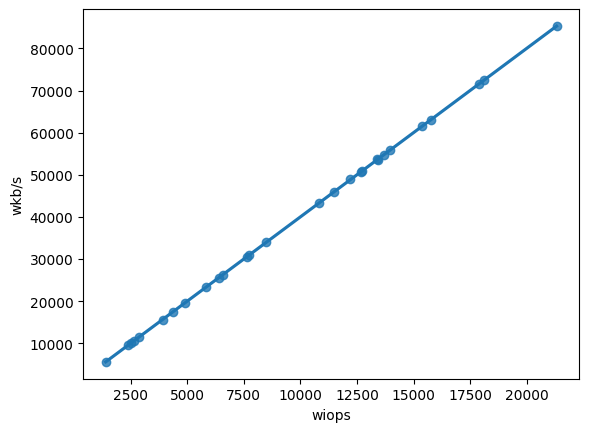

In [11]:
sns.regplot(data=df, x="wiops", y="wkb/s");

<Axes: xlabel='numjobs', ylabel='chans'>

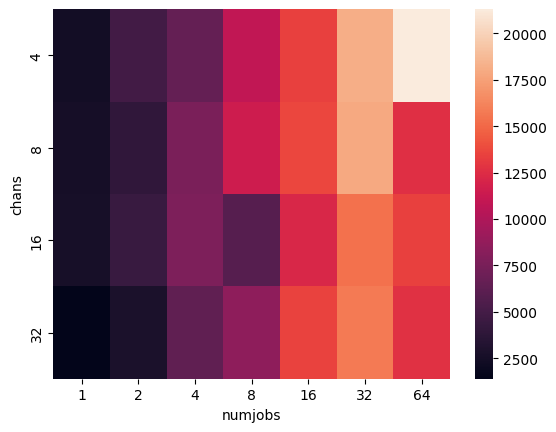

In [12]:
sns.heatmap(df.pivot(index="chans", columns="numjobs", values="riops"))

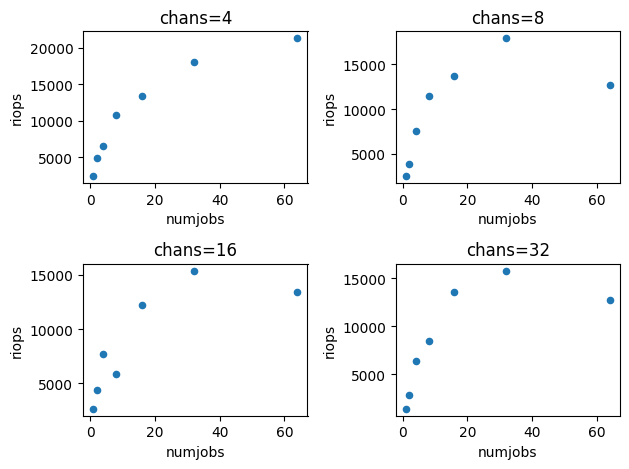

In [27]:
fig, axes = plt.subplots(2, 2)
for i, chans in enumerate([4, 8, 16, 32]):
    df[df["chans"] == chans].plot(ax=axes[i//2, i%2], x="numjobs", y="riops", kind="scatter", title=f'chans={chans}')
plt.tight_layout()
plt.show();

# This is the stuff we did w/ Teona in lab 4/11

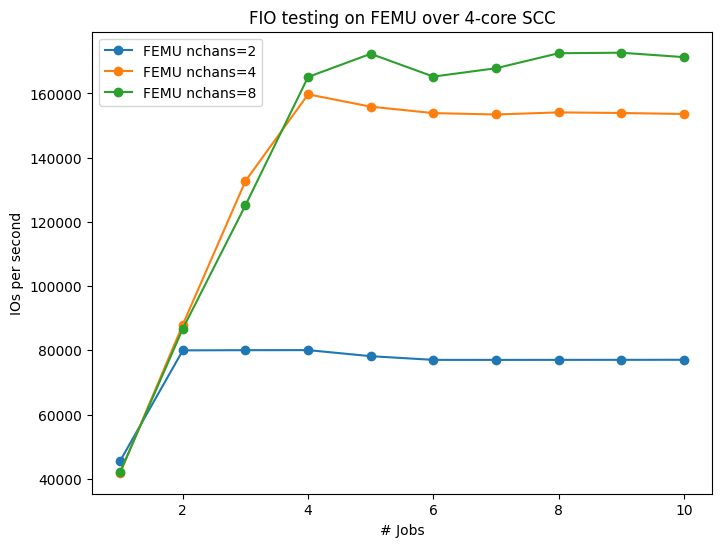

In [12]:
# [285, 307, 307, 326, 322]
# [43065, 89606, 133148, 173500, 169783]
data = [42172, 86754, 125171, 165122, 172329, 165239, 167835, 172510, 172669, 171293]
data2 = [45604, 79994, 80050, 80070, 78182, 77034, 77027, 77036, 77046, 77060]
data3 = [41895, 88034, 132722, 159716, 155874, 153869, 153439, 154088, 153905, 153587]
x = range(1, 11)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, data2, marker='o', label='FEMU nchans=2')
ax.plot(x, data3, marker='o', label='FEMU nchans=4')
ax.plot(x, data, marker='o', label='FEMU nchans=8')
ax.set_xlabel('# Jobs')
ax.set_ylabel('IOs per second')
ax.set_title('FIO testing on FEMU over 4-core SCC')
ax.legend();

In [10]:
# 32-core tests
data = [
    {'chans': 8, 'jobs': 1, 'io/s': 74898},
    {'chans': 8, 'jobs': 2, 'io/s': 148240},
    {'chans': 8, 'jobs': 3, 'io/s': 219316},
    {'chans': 8, 'jobs': 4, 'io/s': 287201},
    {'chans': 8, 'jobs': 5, 'io/s': 305904},
    {'chans': 8, 'jobs': 6, 'io/s': 307705},
    {'chans': 8, 'jobs': 7, 'io/s': 305713},
    {'chans': 8, 'jobs': 8, 'io/s': 307870},
    {'chans': 8, 'jobs': 9, 'io/s': 307981},
    {'chans': 8, 'jobs': 10, 'io/s': 308036},
    {'chans': 8, 'jobs': 11, 'io/s': 308115},
    {'chans': 8, 'jobs': 12, 'io/s': 307280},
    {'chans': 8, 'jobs': 13, 'io/s': 293785},
    {'chans': 8, 'jobs': 14, 'io/s': 293907},
    {'chans': 8, 'jobs': 15, 'io/s': 294261},
    {'chans': 8, 'jobs': 16, 'io/s': 294249},
    {'chans': 4, 'jobs': 1, 'io/s': 75984},
    {'chans': 4, 'jobs': 2, 'io/s': 150730},
    {'chans': 4, 'jobs': 3, 'io/s': 159994},
    {'chans': 4, 'jobs': 4, 'io/s': 160010},
    {'chans': 4, 'jobs': 5, 'io/s': 156454},
    {'chans': 4, 'jobs': 6, 'io/s': 154059},
    {'chans': 4, 'jobs': 7, 'io/s': 154099},
    {'chans': 4, 'jobs': 8, 'io/s': 154089},
    {'chans': 4, 'jobs': 9, 'io/s': 154027},
    {'chans': 4, 'jobs': 10, 'io/s': 154092},
    {'chans': 4, 'jobs': 11, 'io/s': 154079},
    {'chans': 4, 'jobs': 12, 'io/s': 153544},
    {'chans': 4, 'jobs': 13, 'io/s': 147366},
    {'chans': 4, 'jobs': 14, 'io/s': 147767},
    {'chans': 4, 'jobs': 15, 'io/s': 147896},
    {'chans': 4, 'jobs': 16, 'io/s': 147301},
    {'chans': 2, 'jobs': 1, 'io/s': 76709},
    {'chans': 2, 'jobs': 2, 'io/s': 80076},
    {'chans': 2, 'jobs': 3, 'io/s': 80001},
    {'chans': 2, 'jobs': 4, 'io/s': 80024},
    {'chans': 2, 'jobs': 5, 'io/s': 78197},
    {'chans': 2, 'jobs': 6, 'io/s': 77019},
    {'chans': 2, 'jobs': 7, 'io/s': 77038},
    {'chans': 2, 'jobs': 8, 'io/s': 77037},
    {'chans': 2, 'jobs': 9, 'io/s': 77028},
    {'chans': 2, 'jobs': 10, 'io/s': 77058},
    {'chans': 2, 'jobs': 11, 'io/s': 77038},
    {'chans': 2, 'jobs': 12, 'io/s': 76990},
    {'chans': 2, 'jobs': 13, 'io/s': 74382},
    {'chans': 2, 'jobs': 14, 'io/s': 74012},
    {'chans': 2, 'jobs': 15, 'io/s': 74076},
    {'chans': 2, 'jobs': 16, 'io/s': 73936},
]

df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   chans   48 non-null     int64
 1   jobs    48 non-null     int64
 2   io/s    48 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


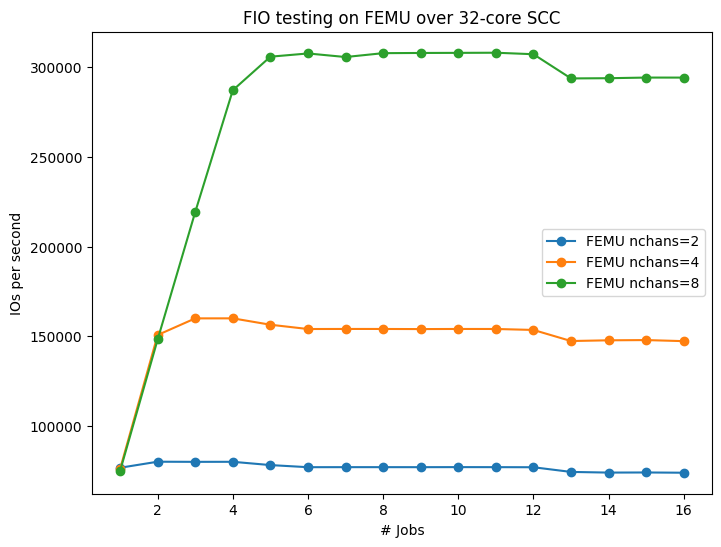

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df2 in df.groupby('chans'):
    df2.plot(x='jobs', y='io/s', marker='o', ax=ax, label=f'FEMU nchans={label}')
ax.set_xlabel('# Jobs')
ax.set_ylabel('IOs per second')
ax.set_title('FIO testing on FEMU over 32-core SCC');

## ACE Data (v2)

In [ ]:
# ./buffermanager -b 20 -x 100000 -k 8 -a 5
raw_data = [
    {"Policy": "LRU", "c": 2, "a": 1, "Exec Time": 41173.9, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 1, "Exec Time": 40311.5, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 2, "Exec Time": 24851, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 4, "Exec Time": 22730.4, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 8, "Exec Time": 26853.8, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 16, "Exec Time": 26043.4, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 32, "Exec Time": 25083.2, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 64, "Exec Time": 30510.4, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 4, "a": 1, "Exec Time": 34982.5, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 1, "Exec Time": 31789.8, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 2, "Exec Time": 23309.2, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 4, "Exec Time": 19842.1, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 8, "Exec Time": 26416.6, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 16, "Exec Time": 24660.1, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 32, "Exec Time": 24554.9, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 4, "a": 5, "k": 64, "Exec Time": 25482.9, "Read IOs": 50187, "Write IOs": 5547},
    
    {"Policy": "LRU", "c": 8, "a": 1, "Exec Time": 11200.5, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 1, "Exec Time": 10561.5, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 2, "Exec Time": 9346.63, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 4, "Exec Time": 9051.65, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 8, "Exec Time": 10434.3, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 16, "Exec Time": 9764.32, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 32, "Exec Time": 10886.7, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 8, "a": 5, "k": 64, "Exec Time": 11231.5, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 16, "a": 1, "Exec Time": 11391, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 1, "Exec Time": 10701.7, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 2, "Exec Time": 11206.3, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 4, "Exec Time": 10222.2, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 8, "Exec Time": 11287.1, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 16, "Exec Time": 11299.2, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 32, "Exec Time": 12327.9, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 16, "a": 5, "k": 64, "Exec Time": 11870.3, "Read IOs": 50187, "Write IOs": 5547},
    
    {"Policy": "LRU", "c": 32, "a": 1, "Exec Time": 10342.2, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 1, "Exec Time": 9525.19, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 2, "Exec Time": 7407.56, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 4, "Exec Time": 6664.12, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 8, "Exec Time": 8494.3, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 16, "Exec Time": 8931.62, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 32, "Exec Time": 9225.7, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 32, "a": 5, "k": 64, "Exec Time": 9083.95, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 64, "a": 1, "Exec Time": 9675.03, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 1, "Exec Time": 10698.4, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 2, "Exec Time": 7857.72, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 4, "Exec Time": 6707.58, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 8, "Exec Time": 8277.79, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 16, "Exec Time": 7924.06, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 32, "Exec Time": 8936.91, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 64, "a": 5, "k": 64, "Exec Time": 8300.24, "Read IOs": 50187, "Write IOs": 5547},
    
    {"Policy": "CFLRU", "c": 2, "a": 1, 
     "Read Time": 15799.3, "Write Time": 16980.5, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 1, 
     "Read Time": 16066.6, "Write Time": 12210.4, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 2, 
     "Read Time": 16924.7, "Write Time": 4749.12, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 4, 
     "Read Time": 17648.6, "Write Time": 2058.1, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 8, 
     "Read Time": 19456, "Write Time": 12794.1, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 16, 
     "Read Time": 20621.5, "Write Time": 15749.3, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 32, 
     "Read Time": 20660.3, "Write Time": 14965.7, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 64, 
     "Read Time": 19222.7, "Write Time": 12982.2, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 4, "a": 1, 
     "Read Time": 16108.8, "Write Time": 15987.7, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 1, 
     "Read Time": 16347.6, "Write Time": 13326, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 2, 
     "Read Time": 17269.7, "Write Time": 5635.21, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 4, 
     "Read Time": 17977.9, "Write Time": 561.262, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 8, 
     "Read Time": 18561, "Write Time": 7976.51, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 16, 
     "Read Time": 18444.2, "Write Time": 8753, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 32, 
     "Read Time": 18459.6, "Write Time": 8995.33, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 4, "a": 5, "k": 64,
     "Read Time": 18459.2, "Write Time": 9142.2, "Read IOs": 50196, "Write IOs": 3253},
    
    {"Policy": "CFLRU", "c": 8, "a": 1, "Exec Time": 11459.5, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 1, "Exec Time": 11601.4, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 2, "Exec Time": 10206.1, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 4, "Exec Time": 10759.2, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 8, "Exec Time": 11962.1, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 16, "Exec Time": 11979, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 32, "Exec Time": 12291.3, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 8, "a": 5, "k": 64, "Exec Time": 11828.9, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 16, "a": 1, "Exec Time": 11204, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 1, "Exec Time": 11023.2, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 2, "Exec Time": 9760.23, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 4, "Exec Time": 10356.6, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 8, "Exec Time": 12270.4, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 16, "Exec Time": 11101.4, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 32, "Exec Time": 11521.5, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 16, "a": 5, "k": 64, "Exec Time": 12492.9, "Read IOs": 50196, "Write IOs": 3253},
    
    {"Policy": "CFLRU", "c": 32, "a": 1, "Exec Time": 8540.17, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 1, "Exec Time": 8321.68, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 2, "Exec Time": 6476.11, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 4, "Exec Time": 6117.87, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 8, "Exec Time": 9483.5, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 16, "Exec Time": 8930.19, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 32, "Exec Time": 8993.18, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 32, "a": 5, "k": 64, "Exec Time": 9463.29, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 64, "a": 1, "Exec Time": 10558.6, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 1, "Exec Time": 9055.63, "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 2, "Exec Time": 7104.2, "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 4, "Exec Time": 6834.86, "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 8, "Exec Time": 9203.12, "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 16, "Exec Time": 8993.6, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 32, "Exec Time": 9105.89, "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 64, "a": 5, "k": 64, "Exec Time": 9288.41, "Read IOs": 50196, "Write IOs": 3253},
    
    {"Policy": "LRU-WSR", "c": 2, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 4, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 4, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
    
    {"Policy": "LRU-WSR", "c": 8, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 8, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 16, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 16, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
    
    {"Policy": "LRU-WSR", "c": 32, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 32, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 64, "a": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 1, "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 2, "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 4, "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 8, "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 16, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 32, "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 64, "a": 5, "k": 64, "Read IOs": 50276, "Write IOs": 3585},
]

In [ ]:
df = pd.DataFrame(raw_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Policy      144 non-null    object 
 1   c           144 non-null    int64  
 2   a           144 non-null    int64  
 3   Exec Time   80 non-null     float64
 4   Read IOs    144 non-null    int64  
 5   Write IOs   144 non-null    int64  
 6   k           126 non-null    float64
 7   Read Time   16 non-null     float64
 8   Write Time  16 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 10.2+ KB


In [ ]:
# preproc
df["Exec Time"].fillna(df["Read Time"]+df["Write Time"], inplace=True)
del df["Read Time"]
del df["Write Time"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Policy     144 non-null    object 
 1   c          144 non-null    int64  
 2   a          144 non-null    int64  
 3   Exec Time  96 non-null     float64
 4   Read IOs   144 non-null    int64  
 5   Write IOs  144 non-null    int64  
 6   k          126 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 8.0+ KB


<Axes: xlabel='k', ylabel='Exec Time'>

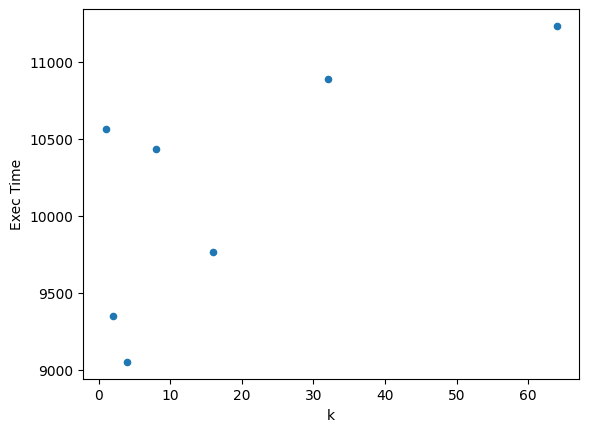

In [ ]:
df_lru = df[df["Policy"] == "LRU"]
df_lru[df_lru["c"] == 8].plot(x="k", y="Exec Time", kind="scatter")

<Axes: xlabel='k', ylabel='c'>

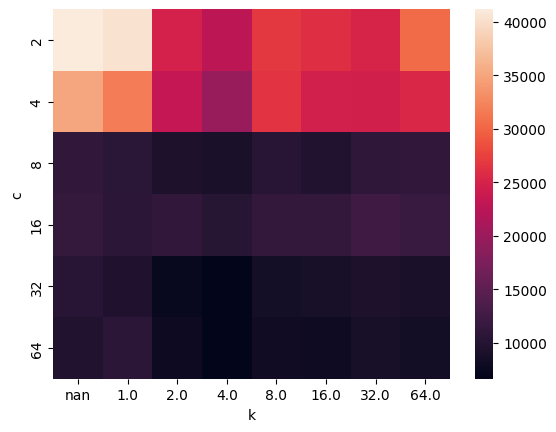

In [ ]:
sns.heatmap(df_lru.pivot(index="c", columns="k", values="Exec Time"))

## below is all old

In [ ]:
raw_data = {
    "LRU": [
        [0.28171, 0.36874, 0.262841, 0.293447, 0.325124, 0.272456],
        [0.275579, 0.30572, 0.273791, 0.279003, 0.314242, 0.286744],
        [0.275572, 0.263423, 0.283012, 0.271025, 0.944937, 0.28326],
        [0.493662, 1.36281, 1.58489, 0.455622, 1.68356, 0.474939],
        [0.415115, 1.06555, 0.440796, 0.407074, 0.428242, 0.44811]
    ],
    "CFLRU": [
        [0.287094, 0.290443, 0.285219, 0.303059, 0.333291, 0.266269],
        [0.288069, 0.297067, 0.291356, 0.29504, 0.29758, 0.315849],
        [0.927584, 0.976015, 0.944146, 0.26992, 0.265757, 0.278178],
        [1.56978, 1.53937, 1.53116, 0.503947, 1.65934, 0.498925],
        [0.411775, 1.28503, 0.40969, 0.427626, 0.425763, 1.43597]
    ],
    "LRU-WSR": [
        [0.317221, 0.279914, 0.276451, 0.281423, 0.324301, 0.364748],
        [0.285101, 0.289854, 0.29664, 0.2792, 0.278329, 0.320304],
        [0.28108, 1.29242, 0.991301, 1.43693, 0.447472, 1.43452],
        [1.59057, 1.55234, 1.58517, 0.477171, 1.66597, 0.495076],
        [0.415186, 1.26919, 0.418681, 0.431878, 0.421693, 0.416233]
    ]
}

In [ ]:
# k=row, c=col
df = pd.DataFrame(raw_data["LRU-WSR"], columns=[2,4,8,16,32,64], index=[2,4,8,16,32])
df.head()

,2,4,8,16,32,64
2,0.317221,0.279914,0.276451,0.281423,0.324301,0.364748
4,0.285101,0.289854,0.296640,0.279200,0.278329,0.320304
8,0.281080,1.292420,0.991301,1.436930,0.447472,1.434520
16,1.590570,1.552340,1.585170,0.477171,1.665970,0.495076
32,0.415186,1.269190,0.418681,0.431878,0.421693,0.416233


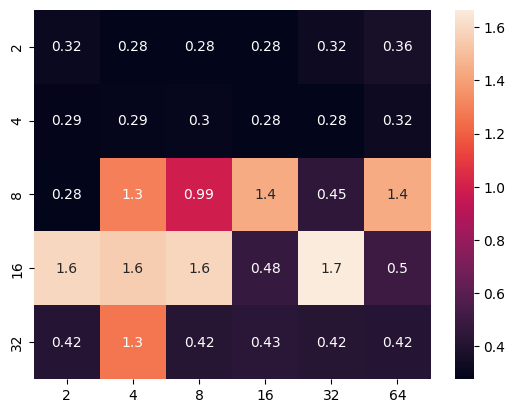

In [ ]:
sns.heatmap(df, annot=True);
# run bigger experiments
# get a baseline (k=1)
# tommy: test a=5

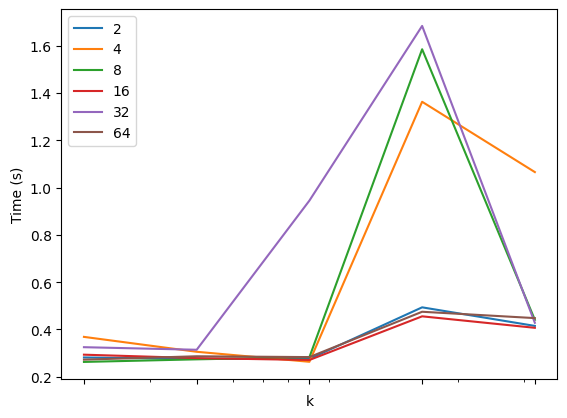

In [ ]:
df.plot(logx=True, xticks=[2,4,8,16,32], xlabel="k", ylabel="Time (s)");

## Concurrency vs. Latency (num_of_channels=2 in FEMU) ## 

In [ ]:
# ./buffermanager -b 20 -x 100000 -k 8 -a 5
raw_data = [
    {"Policy": "LRU", "c": 2, "a": 1, "Exec Time": 13579.9, "Read IOs": 50187, "Write IOs": 23180},

    {"Policy": "LRU", "c": 2, "a": 5, "k": 1, "Exec Time": 12688.2, "Read IOs": 50187, "Write IOs": 23180},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 2, "Exec Time": 10681.2, "Read IOs": 50187, "Write IOs": 12076},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 4, "Exec Time": 10298.8, "Read IOs": 50187, "Write IOs": 6846},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 8, "Exec Time": 11700.7, "Read IOs": 50187, "Write IOs": 5555},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 16, "Exec Time": 11315.3, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 32, "Exec Time": 11578.1, "Read IOs": 50187, "Write IOs": 5547},
    {"Policy": "LRU", "c": 2, "a": 5, "k": 64, "Exec Time": 11796.4.4, "Read IOs": 50187, "Write IOs": 5547},

    {"Policy": "CFLRU", "c": 2, "a": 1, "Exec Time": , "Read IOs": 50247, "Write IOs": 19720},

    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 1, "Exec Time": , "Read IOs": 50247, "Write IOs": 19720},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 2, "Exec Time": , "Read IOs": 50302, "Write IOs": 10252},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 4, "Exec Time": , "Read IOs": 50176, "Write IOs": 5472},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 8, "Exec Time": , "Read IOs": 50275, "Write IOs": 3321},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 16, "Exec Time": , "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 32, "Exec Time": , "Read IOs": 50196, "Write IOs": 3253},
    {"Policy": "CFLRU", "c": 2, "a": 5, "k": 64, "Exec Time": , "Read IOs": 50196, "Write IOs": 3253},
    
    {"Policy": "LRU-WSR", "c": 2, "a": 1, "Exec Time": , "Read IOs": 50272, "Write IOs": 20782},

    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 1, "Exec Time": , "Read IOs": 50272, "Write IOs": 20782},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 2, "Exec Time": , "Read IOs": 50196, "Write IOs": 11015},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 4, "Exec Time": , "Read IOs": 50233, "Write IOs": 6074},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 8, "Exec Time": , "Read IOs": 50258, "Write IOs": 3736},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 16, "Exec Time": , "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 32, "Exec Time": , "Read IOs": 50276, "Write IOs": 3585},
    {"Policy": "LRU-WSR", "c": 2, "a": 5, "k": 64, "Exec Time": , "Read IOs": 50276, "Write IOs": 3585},

    ]